In [80]:
from NeuralNetwork import NeuralNet
import jax.numpy as np
import numpy as onp
import matplotlib.pyplot as plt
from jax import jit

In [81]:
@jit
def FrankeFunction(x: np.ndarray, y: np.ndarray) -> np.ndarray:
    """Franke's function for evaluating methods.

    inputs:
        x (np.array): values in x direction

        y (np.array): values in y direction

    returns:
        (np.array) values in z direction
    """

    term1 = 0.75 * np.exp(-(0.25 * (9 * x - 2) ** 2) - 0.25 * ((9 * y - 2) ** 2))
    term2 = 0.75 * np.exp(-((9 * x + 1) ** 2) / 49.0 - 0.1 * (9 * y + 1))
    term3 = 0.5 * np.exp(-((9 * x - 7) ** 2) / 4.0 - 0.25 * ((9 * y - 3) ** 2))
    term4 = -0.2 * np.exp(-((9 * x - 4) ** 2) - (9 * y - 7) ** 2)
    return term1 + term2 + term3 + term4

In [82]:
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
x, y = np.meshgrid(x, y)
z = FrankeFunction(x, y).reshape(-1, 1)

In [83]:
X = np.hstack((x.reshape(-1, 1), y.reshape(-1, 1)))

In [84]:
from Schedules import Adam
from Activators import sigmoid

dimensions = (2, 75, 75, 100, 1)
FFNN = NeuralNet(
    dimensions, hidden_func=sigmoid, output_func=jit(lambda x: x), seed=2023
)

In [85]:
scores = FFNN.fit(
    X, z, epochs=250, scheduler=Adam(0.0001, 0.9, 0.999), batches=10, lmbda=0.001
)

100%|██████████| 2500/2500 [00:12<00:00, 199.63it/s]


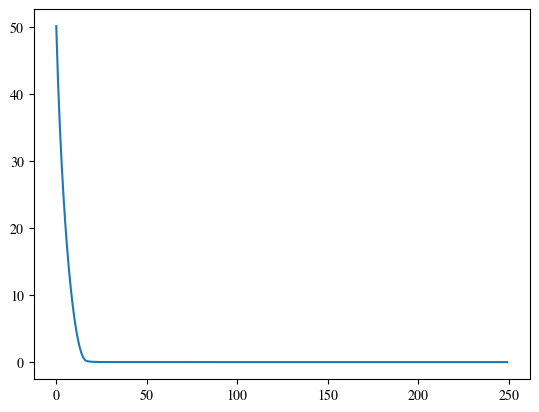

In [86]:
plt.plot(scores["train_errors"])

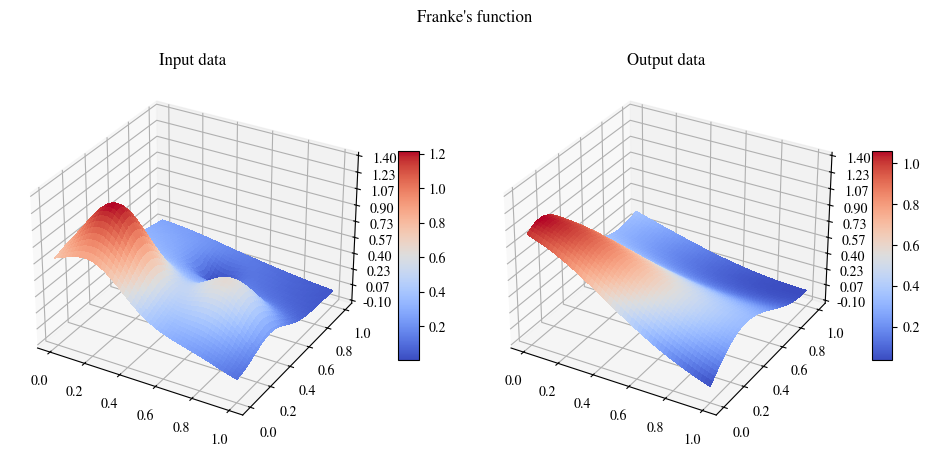

In [87]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

xnew = np.linspace(0, 1, 100)
ynew = np.linspace(0, 1, 100)
xnew, ynew = np.meshgrid(xnew, ynew)
znew = FFNN.predict(
    np.c_[xnew.ravel().reshape(-1, 1), ynew.ravel().reshape(-1, 1)]
).reshape(100, 100)

fig = plt.figure(figsize=plt.figaspect(0.5))

ax = fig.add_subplot(1, 2, 1, projection="3d")
surf = ax.plot_surface(
    x,
    y,
    z.reshape(100, 100),
    cmap=cm.coolwarm,
    linewidth=0,
    antialiased=False,
)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
ax.set_title("Input data")

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=10)

ax = fig.add_subplot(1, 2, 2, projection="3d")
surf = ax.plot_surface(
    xnew,
    ynew,
    znew,
    cmap=cm.coolwarm,
    linewidth=0,
    antialiased=False,
)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
ax.set_title("Output data")

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=10)

fig.suptitle("Franke's function")

plt.tight_layout()

In [91]:
from Schedules import Adam
from Activators import zero_one_clip

dimensions = (2, 75, 75, 100, 1)
FFNN = NeuralNet(
    dimensions, hidden_func=zero_one_clip, output_func=jit(lambda x: x), seed=2023
)
scores = FFNN.fit(
    X, z, epochs=200, scheduler=Adam(0.001, 0.9, 0.999), batches=100, lmbda=0.0001
)

100%|██████████| 20000/20000 [00:40<00:00, 494.83it/s]


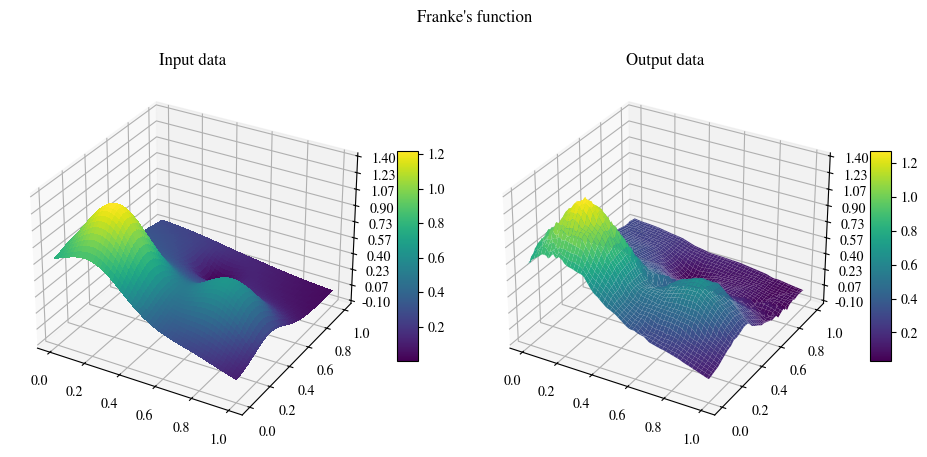

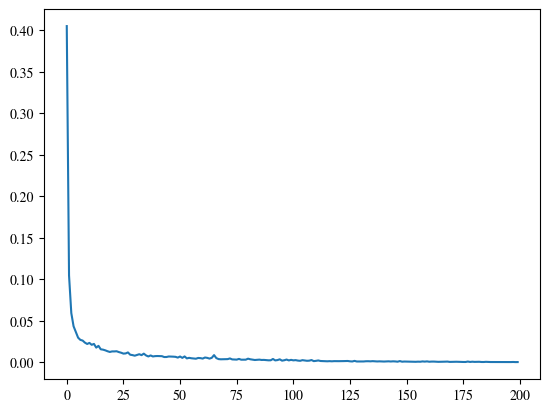

In [94]:
plt.plot(scores["train_errors"])

In [96]:
from plotutils import plot_Franke

plot_Franke(FFNN, x, y, z)

ImportError: cannot import name 'plot_Franke' from 'plotutils' (/Users/augustfemtehjell/Documents/Høst23/FYSSTK/Project2/src/plotutils.py)